**Guided Project: Build an Image Classifier with Python**

In [ ]:
#Here we load the Mnist data from Keras
import tensorflow as tf
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
#get an idea of shape of train data
x_train.shape

11501568/11490434 [==============================] - 0s 0us/step


(60000, 28, 28)

In [ ]:
x_test.shape

(10000, 28, 28)

2


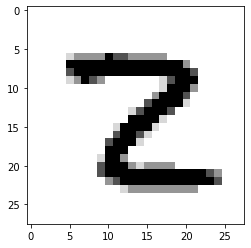

In [ ]:
#Here we preview an element of the data
import matplotlib.pyplot as plt
 # Only use this if using iPython
image_index = 58000 # You may select anything up to 60,000
print(y_train[image_index]) # To display the label number
plt.imshow(x_train[image_index], cmap='Greys') #to show the image associated with label

In [ ]:
x_train[image_index]       # This is how the computer sees the aboove image

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

In [ ]:
#Reshaping and preprocessing
# Reshaping the array to 4-dims so that it can work with the Keras API
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)   # 0 refers to rows, 28by28 pixels, passed in single channel (1-D)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
input_shape = (28, 28, 1)
# Making sure that the values are float so that we can get decimal points after division
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
# Normalizing the RGB codes by dividing it to the max RGB value. 
x_train /= 255    # similar to c = c/a
x_test /= 255     # normalizing to get all the values between 0 and 1
print('x_train shape:', x_train.shape)
print('Number of images in x_train', x_train.shape[0])
print('Number of images in x_test', x_test.shape[0])

x_train shape: (60000, 28, 28, 1)
Number of images in x_train 60000
Number of images in x_test 10000


In [ ]:
x_train[image_index]   # we can see the effect of single channel and normalization here

array([[[0.       ],
        [0.       ],
        [0.       ],
        [0.       ],
        [0.       ],
        [0.       ],
        [0.       ],
        [0.       ],
        [0.       ],
        [0.       ],
        [0.       ],
        [0.       ],
        [0.       ],
        [0.       ],
        [0.       ],
        [0.       ],
        [0.       ],
        [0.       ],
        [0.       ],
        [0.       ],
        [0.       ],
        [0.       ],
        [0.       ],
        [0.       ],
        [0.       ],
        [0.       ],
        [0.       ],
        [0.       ]],

       [[0.       ],
        [0.       ],
        [0.       ],
        [0.       ],
        [0.       ],
        [0.       ],
        [0.       ],
        [0.       ],
        [0.       ],
        [0.       ],
        [0.       ],
        [0.       ],
        [0.       ],
        [0.       ],
        [0.       ],
        [0.       ],
        [0.       ],
        [0.       ],
        [0.       ],
        [0.

In [ ]:
#Building to Keras
# Importing the required Keras modules containing model and layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D
# Creating a Sequential Model and adding the layers
model = Sequential() #chosen Keras model
model.add(Conv2D(28, kernel_size=(3,3), input_shape=input_shape)) #convolution
model.add(MaxPooling2D(pool_size=(2, 2))) #pooling layer    
model.add(Flatten()) # Flattening the 2D arrays for fully connected layers
model.add(Dense(64, activation=tf.nn.relu)) #dense layer relu
model.add(Dropout(0.2))
model.add(Dense(10,activation=tf.nn.softmax)) #dense layer softmax

In [ ]:
#Compiling and fitting the model
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])
model.fit(x=x_train,y=y_train, epochs=15)

Epoch 1/15
1875/1875 [==============================] - 30s 15ms/step - loss: 0.2580 - accuracy: 0.9223
Epoch 2/15
1875/1875 [==============================] - 29s 15ms/step - loss: 0.1130 - accuracy: 0.9656
Epoch 3/15
1875/1875 [==============================] - 29s 15ms/step - loss: 0.0856 - accuracy: 0.9734
Epoch 4/15
1875/1875 [==============================] - 29s 16ms/step - loss: 0.0665 - accuracy: 0.9788
Epoch 5/15
1875/1875 [==============================] - 29s 15ms/step - loss: 0.0570 - accuracy: 0.9816
Epoch 6/15
1875/1875 [==============================] - 29s 15ms/step - loss: 0.0488 - accuracy: 0.9841
Epoch 7/15
1875/1875 [==============================] - 29s 16ms/step - loss: 0.0414 - accuracy: 0.9858
Epoch 8/15
1875/1875 [==============================] - 29s 16ms/step - loss: 0.0387 - accuracy: 0.9872
Epoch 9/15
1875/1875 [==============================] - 29s 15ms/step - loss: 0.0336 - accuracy: 0.9885
Epoch 10/15
1875/1875 [==============================] - 29s 16m

In [ ]:
#evaluating
model.evaluate(x_test, y_test)

313/313 [==============================] - 2s 7ms/step - loss: 0.0649 - accuracy: 0.9846


[0.06492026895284653, 0.9846000075340271]

2


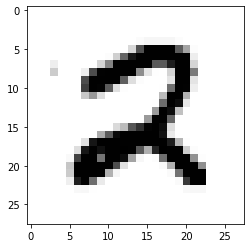

In [ ]:
#testing on test data
image_index = 6521 #choose random value up to 10000
plt.imshow(x_test[image_index].reshape(28, 28),cmap='Greys')
pred = model.predict(x_test[image_index].reshape(1, 28, 28, 1))
print(pred.argmax())


In [ ]:
# Previewing the downloaded image
import cv2
import numpy as np
import matplotlib.pyplot as plt
# Load image as Grayscale
im = cv2.imread('guess.jpg')
# show image
plt.imshow(im, cmap = 'gray'), plt.axis('off')
plt.show()

In [ ]:
im.shape

In [ ]:
from tensorflow.keras.preprocessing import image #Import Keras image processor

In [ ]:
# load downloaded image and resize to target size
img = image.load_img('guess.jpg', target_size = (28, 28), color_mode = 'grayscale')

In [ ]:
#convert loaded and resized image to array of numbers
img_array = image.img_to_array(img)


In [ ]:
#Confirm new shape
img_array.shape

In [ ]:
#Convert image array to 2D format that can be predicted upon
img_array = img_array[:,:,0]
img_array.shape

In [ ]:
plt.imshow(img_array,cmap="Greys")

In [ ]:
#invert loaded image array into same format as data used for training
img_array=1-img_array
plt.imshow(img_array,cmap="Greys")

# New Section

In [ ]:
#Running Prediction on the image

plt.imshow(img_array,cmap="Greys")
pred = model.predict(img_array.reshape(1, 28, 28, 1))
print(pred.argmax())
